<a href="https://colab.research.google.com/github/111Shreyas/apptestgithubaction/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Real-time Object Detection

!pip install ultralytics opencv-python matplotlib   # Installs required libraries (works in Colab/Jupyter, not in plain VS Code scripts)

# Import all libraries
import cv2                                          # OpenCV library for        computer vision tasks (image/video processing)
import numpy as np                                  # NumPy for numerical operations and array handling
from ultralytics import YOLO                        # Import YOLO (You Only Look Once) model from Ultralytics package
# from ultralytics = This tells Python to use the Ultralytics library, which is a package that provides ready‑to‑use implementations of the YOLO (You Only Look Once) family of models

import matplotlib.pyplot as plt                     # Matplotlib for plotting and visualizing images/graphs
from IPython.display import display, Image, clear_output  # Jupyter/Colab utilities for displaying images inline
import time                                         # Python's time module (for delays, measuring execution time)

from google.colab import files                      #  Colab-only: for uploading/downloading files in Colab
from google.colab.patches import cv2_imshow         #  Colab-only: special function to display OpenCV images in Colab
import io                                           # Provides tools for handling streams of data (e.g., in-memory files)
from PIL import Image as PILImage                   # Python Imaging Library (PIL) for image manipulation

print(" All libraries installed successfully!")     # Confirmation message after imports
print("Ready to detect objects!")                # Prints readiness message

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
 All libraries installed successfully!
Ready to detect objects!


In [ ]:
# Load Pretrained YOLO Model

print(" Loading YOLO model...")
print("Please wait... (First time takes 1-2 minutes)")

# Load the smallest, fastest YOLO model
model = YOLO('yolov8n.pt')  # Auto-downloads first time

print(" YOLO model loaded successfully!")
print("Can detect 80 different objects!")


 Loading YOLO model...
Please wait... (First time takes 1-2 minutes)
 YOLO model loaded successfully!
Can detect 80 different objects!


 Please upload an image file...


Saving WhatsApp Image 2025-10-14 at 12.44.01 PM.jpeg to WhatsApp Image 2025-10-14 at 12.44.01 PM.jpeg

🔍 Detecting objects in: WhatsApp Image 2025-10-14 at 12.44.01 PM.jpeg

0: 480x640 9 persons, 1 bottle, 3 chairs, 13 laptops, 449.0ms
Speed: 23.0ms preprocess, 449.0ms inference, 46.9ms postprocess per image at shape (1, 3, 480, 640)


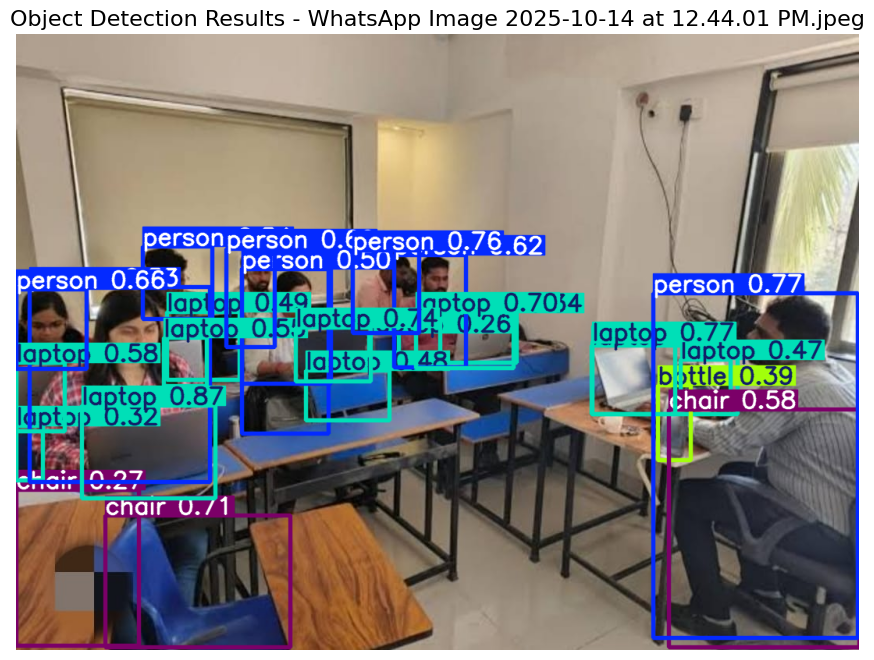

✅ Found 26 objects:
   1. laptop (confidence: 0.87)
   2. person (confidence: 0.77)
   3. laptop (confidence: 0.77)
   4. person (confidence: 0.76)
   5. laptop (confidence: 0.74)
   6. chair (confidence: 0.71)
   7. laptop (confidence: 0.70)
   8. person (confidence: 0.66)
   9. person (confidence: 0.62)
   10. person (confidence: 0.60)
   11. laptop (confidence: 0.58)
   12. chair (confidence: 0.58)
   13. laptop (confidence: 0.55)
   14. person (confidence: 0.54)
   15. person (confidence: 0.53)
   16. person (confidence: 0.50)
   17. laptop (confidence: 0.49)
   18. laptop (confidence: 0.48)
   19. laptop (confidence: 0.47)
   20. person (confidence: 0.43)
   21. bottle (confidence: 0.39)
   22. laptop (confidence: 0.34)
   23. laptop (confidence: 0.32)
   24. laptop (confidence: 0.27)
   25. chair (confidence: 0.27)
   26. laptop (confidence: 0.26)


In [ ]:

# Method 1: Upload Image and Detect Objects


def detect_in_uploaded_image():
    """
    Upload your image and detect objects
    """
    print(" Please upload an image file...")

    # Upload image files
    uploaded = files.upload()

    # Process each uploaded image
    for filename in uploaded.keys():
        print(f"\n Detecting objects in: {filename}")

        # Read the uploaded image
        image = cv2.imread(filename)

        if image is None:
            print("Error: Cannot read image file")
            continue

        # Run YOLO detection
        results = model(image)

        # Draw bounding boxes on image
        detected_image = results[0].plot()

        # Convert BGR to RGB for proper display
        detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

        # Display results
        plt.figure(figsize=(12, 8))
        plt.imshow(detected_image_rgb)
        plt.axis('off')
        plt.title(f'Object Detection Results - {filename}', fontsize=16)
        plt.show()

        # Print detection summary
        detections = results[0].boxes
        if len(detections) > 0:
            print(f" Found {len(detections)} objects:")
            for i, box in enumerate(detections):
                class_name = results[0].names[int(box.cls)]
                confidence = float(box.conf)
                print(f"   {i+1}. {class_name} (confidence: {confidence:.2f})")
        else:
            print(" No objects detected")

# Run the function
detect_in_uploaded_image()



 Detecting objects in people image...

0: 384x640 9 persons, 314.3ms
Speed: 7.9ms preprocess, 314.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


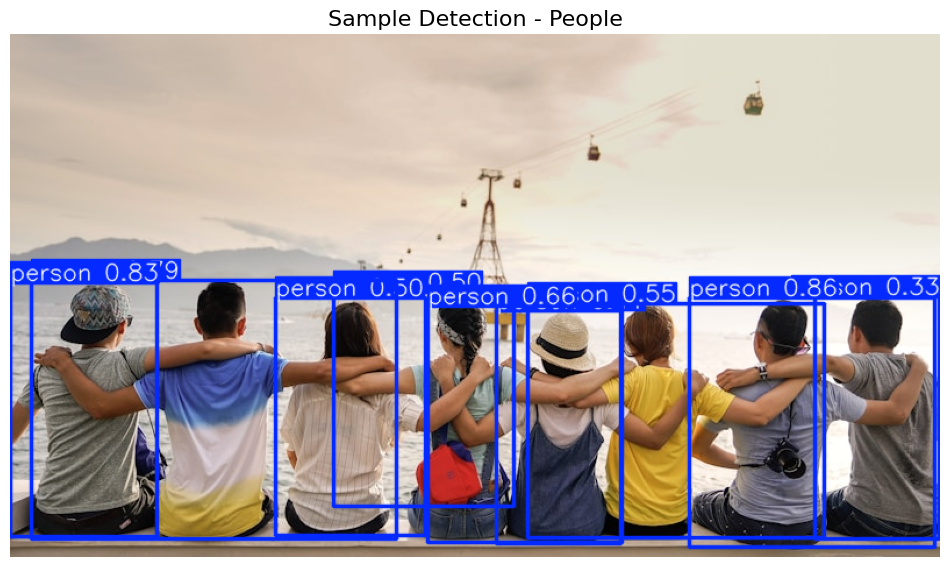

 Detected 9 objects in people image

 Detecting objects in cars image...

0: 448x640 9 persons, 10 cars, 5 traffic lights, 476.6ms
Speed: 11.3ms preprocess, 476.6ms inference, 12.6ms postprocess per image at shape (1, 3, 448, 640)


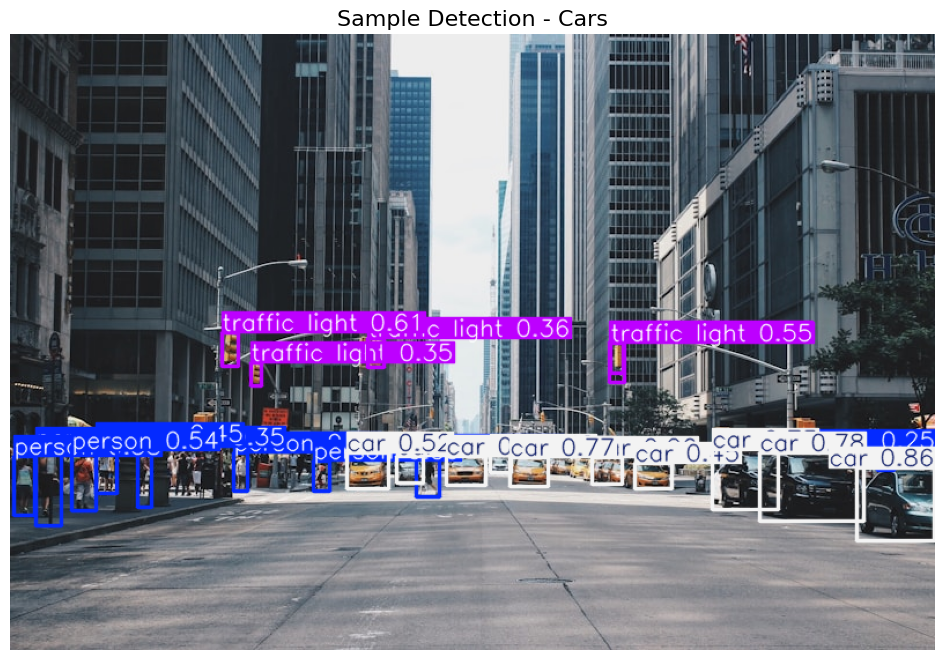

 Detected 24 objects in cars image

 Detecting objects in animals image...

0: 640x448 1 giraffe, 547.0ms
Speed: 13.3ms preprocess, 547.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


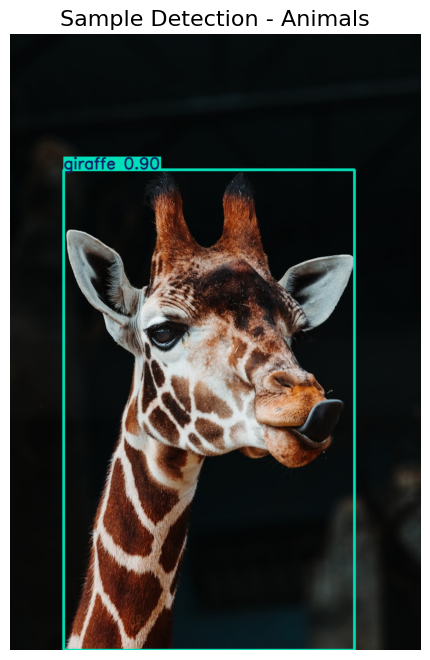

 Detected 1 objects in animals image


In [ ]:
# ============================================
# Method 2: Use Sample Images from Internet
# ============================================

import urllib.request

def detect_sample_images():
    """
    Download sample images and detect objects
    """
    # Sample image URLs
    sample_images = {
        "people": "https://images.unsplash.com/photo-1529156069898-49953e39b3ac?w=800",
        "cars": "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=800",
        "animals": "https://images.unsplash.com/photo-1574870111867-089730e5a72b?w=800"
    }

    for name, url in sample_images.items():
        try:
            print(f"\n Downloading sample image: {name}")

            # Download image
            urllib.request.urlretrieve(url, f"{name}.jpg")

            # Read image
            image = cv2.imread(f"{name}.jpg")

            print(f" Detecting objects in {name} image...")

            # Run detection
            results = model(image)

            # Draw results
            detected_image = results[0].plot()
            detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

            # Display
            plt.figure(figsize=(12, 8))
            plt.imshow(detected_image_rgb)
            plt.axis('off')
            plt.title(f'Sample Detection - {name.title()}', fontsize=16)
            plt.show()

            # Print summary
            detections = results[0].boxes
            print(f" Detected {len(detections)} objects in {name} image")

        except Exception as e:
            print(f" Error with {name}: {str(e)}")

# Run sample detection
detect_sample_images()


 Upload your video file:


Saving WhatsApp Video 2025-10-28 at 10.21.43 PM.mp4 to WhatsApp Video 2025-10-28 at 10.21.43 PM.mp4
File uploaded: WhatsApp Video 2025-10-28 at 10.21.43 PM.mp4
 Video opened successfully!

0: 384x640 3 persons, 2 cars, 1 truck, 348.3ms
Speed: 23.0ms preprocess, 348.3ms inference, 37.3ms postprocess per image at shape (1, 3, 384, 640)


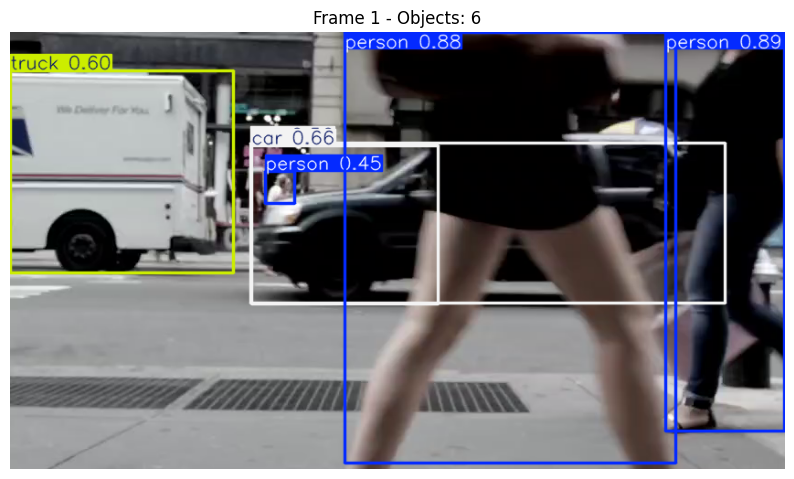

Frame 1 detections:
  - person: 0.89
  - person: 0.88
  - car: 0.66
  - truck: 0.60
  - car: 0.56
  - person: 0.45

0: 384x640 3 persons, 2 cars, 1 truck, 1 skateboard, 155.7ms
Speed: 3.8ms preprocess, 155.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


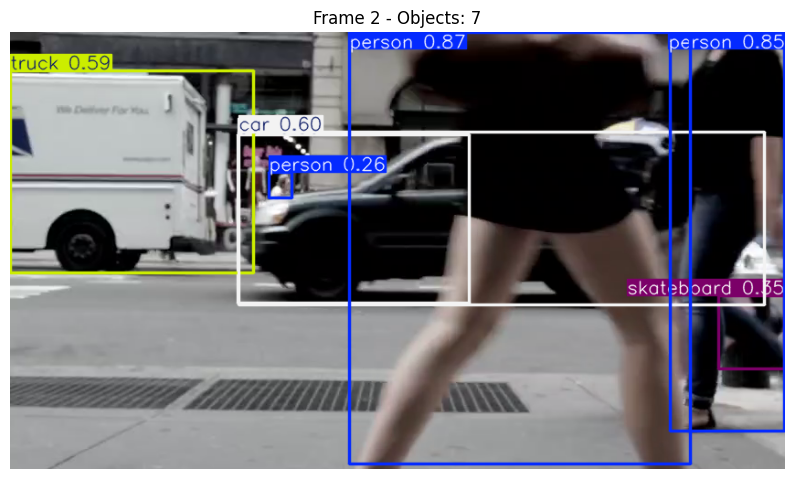

Frame 2 detections:
  - person: 0.87
  - person: 0.85
  - car: 0.60
  - truck: 0.59
  - car: 0.39
  - skateboard: 0.35
  - person: 0.26

0: 384x640 2 persons, 2 cars, 2 trucks, 190.7ms
Speed: 4.4ms preprocess, 190.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


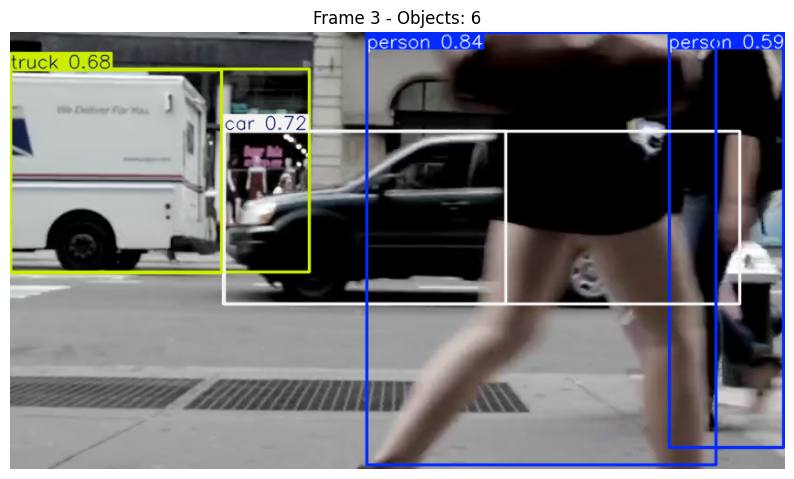

Frame 3 detections:
  - person: 0.84
  - car: 0.72
  - truck: 0.68
  - car: 0.66
  - person: 0.59
  - truck: 0.39

0: 384x640 2 persons, 2 cars, 1 truck, 168.4ms
Speed: 4.2ms preprocess, 168.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


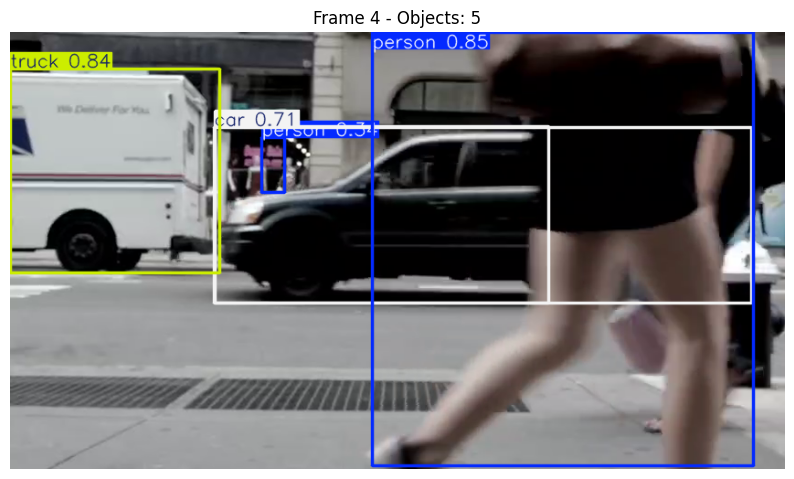

Frame 4 detections:
  - person: 0.85
  - truck: 0.84
  - car: 0.71
  - car: 0.66
  - person: 0.34

0: 384x640 1 person, 1 car, 1 truck, 171.5ms
Speed: 4.2ms preprocess, 171.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


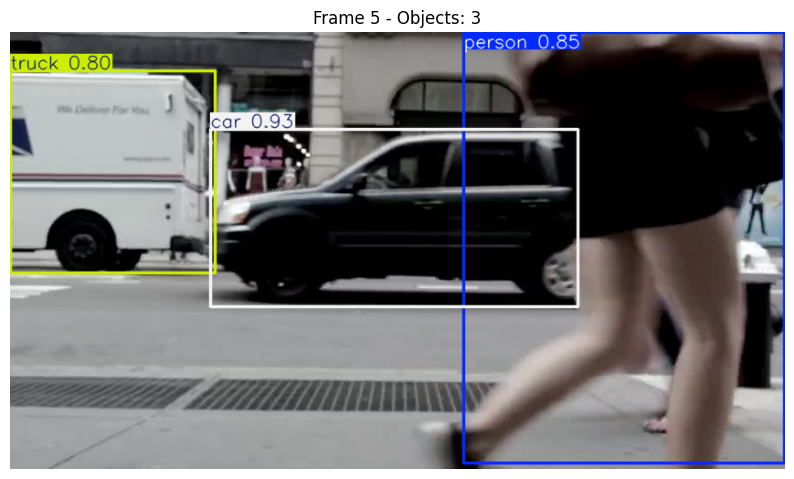

Frame 5 detections:
  - car: 0.93
  - person: 0.85
  - truck: 0.80

0: 384x640 2 persons, 1 car, 1 truck, 186.1ms
Speed: 4.1ms preprocess, 186.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


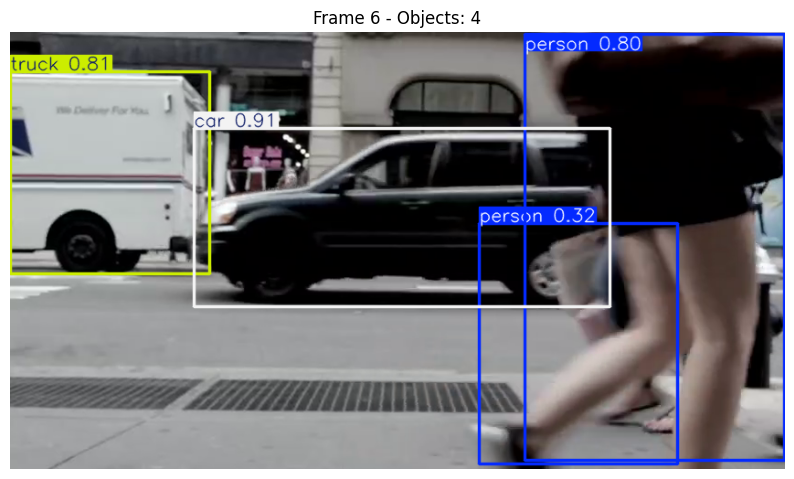

Frame 6 detections:
  - car: 0.91
  - truck: 0.81
  - person: 0.80
  - person: 0.32

0: 384x640 2 persons, 1 car, 1 truck, 178.8ms
Speed: 4.3ms preprocess, 178.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


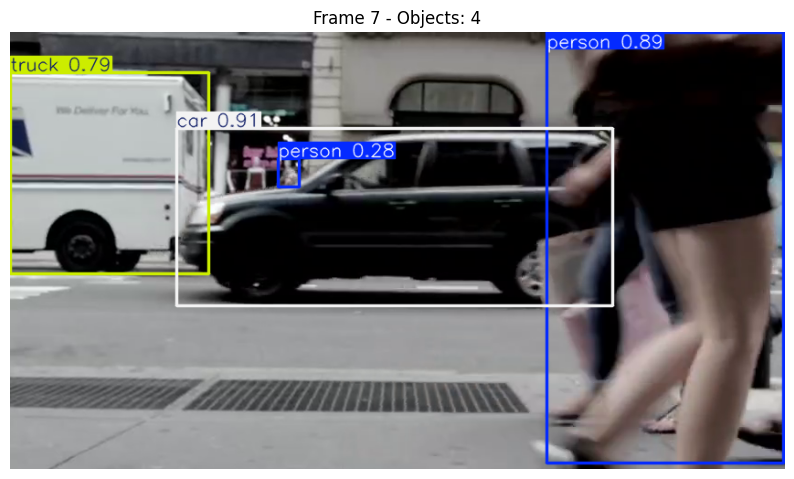

Frame 7 detections:
  - car: 0.91
  - person: 0.89
  - truck: 0.79
  - person: 0.28

0: 384x640 2 persons, 2 cars, 1 truck, 175.5ms
Speed: 4.6ms preprocess, 175.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


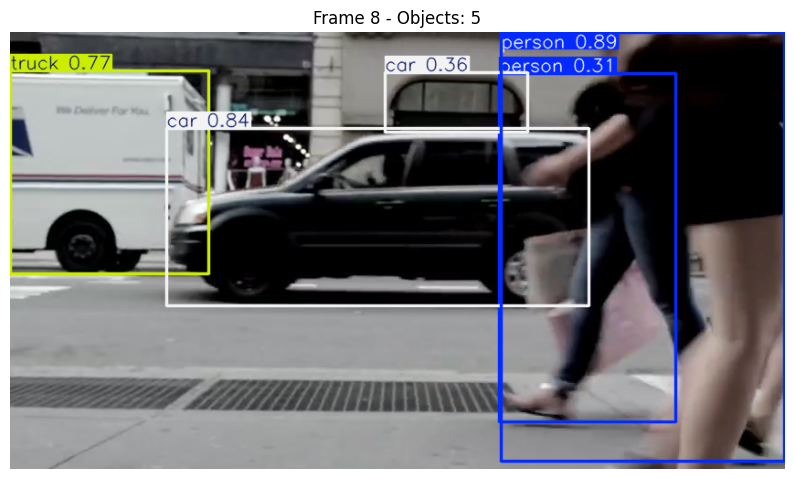

Frame 8 detections:
  - person: 0.89
  - car: 0.84
  - truck: 0.77
  - car: 0.36
  - person: 0.31

0: 384x640 2 persons, 2 cars, 1 truck, 179.1ms
Speed: 3.8ms preprocess, 179.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


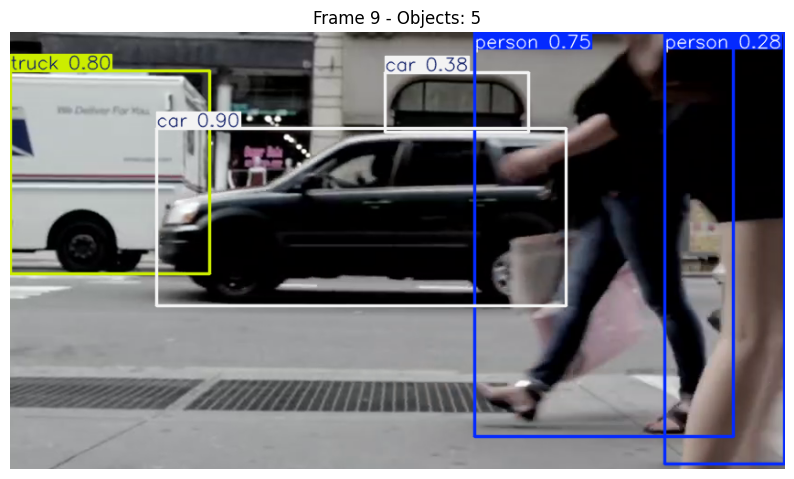

Frame 9 detections:
  - car: 0.90
  - truck: 0.80
  - person: 0.75
  - car: 0.38
  - person: 0.28

0: 384x640 2 persons, 2 cars, 1 truck, 184.5ms
Speed: 4.3ms preprocess, 184.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


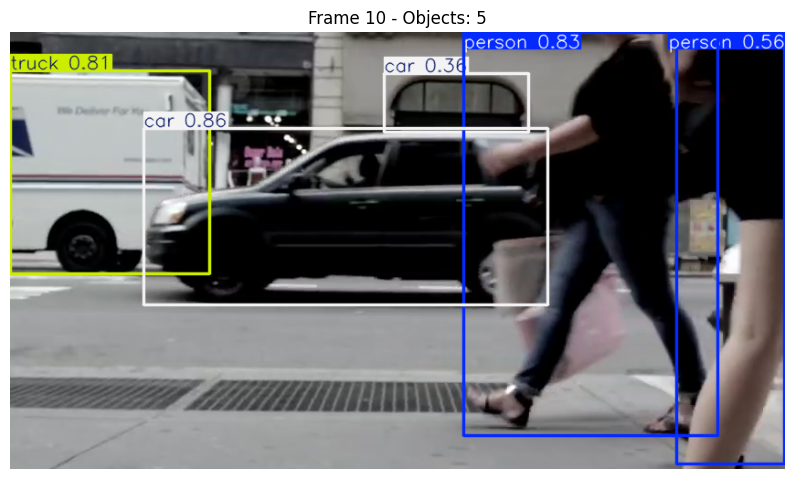

Frame 10 detections:
  - car: 0.86
  - person: 0.83
  - truck: 0.81
  - person: 0.56
  - car: 0.36
 Video detection complete!


In [ ]:

# VIDEO DETECTION


from google.colab import files
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

def simple_video_detection():

    # Upload video
    print(" Upload your video file:")
    uploaded = files.upload()

    if not uploaded:
        print(" No file uploaded")
        return

    video_file = list(uploaded.keys())[0]
    print(f"File uploaded: {video_file}")

    # Load model
    model = YOLO('yolov8n.pt')

    # Open video
    cap = cv2.VideoCapture(video_file)

    if not cap.isOpened():
        print(" Cannot read video file")
        print(" Try uploading MP4 format, smaller size")
        return

    print(" Video opened successfully!")

    # Process first 10 frames only
    for frame_num in range(10):
        ret, frame = cap.read()

        if not ret:
            print(" End of video")
            break

        # Detect objects
        results = model(frame)

        # Show result
        detected = results[0].plot()
        detected_rgb = cv2.cvtColor(detected, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 6))
        plt.imshow(detected_rgb)
        plt.axis('off')
        plt.title(f'Frame {frame_num + 1} - Objects: {len(results[0].boxes)}')
        plt.show()

        # Print detections
        if len(results[0].boxes) > 0:
            print(f"Frame {frame_num + 1} detections:")
            for box in results[0].boxes:
                name = results[0].names[int(box.cls)]
                conf = float(box.conf)
                print(f"  - {name}: {conf:.2f}")
        else:
            print(f"Frame {frame_num + 1}: No objects detected")

    cap.release()

    # Clean up
    try:
        os.remove(video_file)
    except:
        pass

    print(" Video detection complete!")

# Run this simpler version
simple_video_detection()
